In [1]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import cv2

# Test items

In [2]:
img1_path = "dataset/img1.jpg"
img2_path = "dataset/couple.jpg"

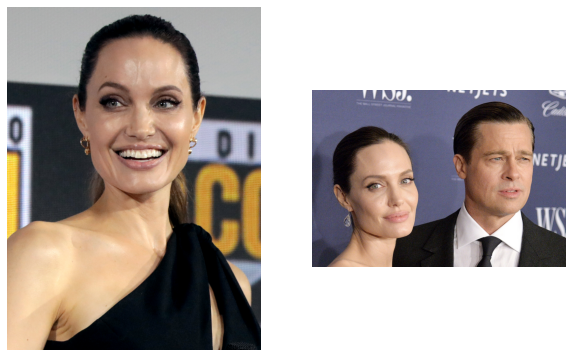

In [3]:
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1)

plt.imshow(img1[:,:,::-1])
plt.axis("off")

fig.add_subplot(1, 2, 2)
plt.imshow(img2[:,:,::-1])
plt.axis("off")

plt.show()

## Facial Attribute Analysis

In [4]:
analysis_objs = DeepFace.analyze(img_path=img2_path, silent=True)

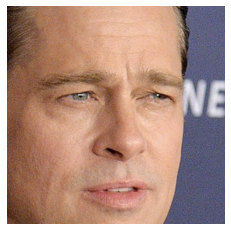

31 years old Man with latino hispanic ethnicity in fear mood
----------------


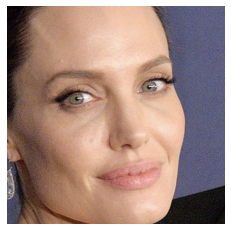

31 years old Woman with white ethnicity in neutral mood
----------------


In [5]:
for analysis_obj in analysis_objs:
    x = analysis_obj["region"]["x"]
    y = analysis_obj["region"]["y"]
    w = analysis_obj["region"]["w"]
    h = analysis_obj["region"]["h"]
    facial_area = img2[y:y+h, x:x+w]

    plt.imshow(facial_area[:,:,::-1])
    plt.axis("off")
    plt.show()

    age = analysis_obj["age"]
    gender = analysis_obj["dominant_gender"]
    emotion = analysis_obj["dominant_emotion"]
    race = analysis_obj["dominant_race"]

    print(f"{age} years old {gender} with {race} ethnicity in {emotion} mood")

    print("----------------")


# Face verification with different detectors

In [6]:
detector_backends = ["opencv", "ssd", "dlib", "mtcnn", "retinaface", "skip"]

working with opencv
{'verified': True, 'distance': 0.32079959497933064, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 345, 'y': 211, 'w': 769, 'h': 769}, 'img2': {'x': 318, 'y': 534, 'w': 779, 'h': 779}}, 'time': 2.48}


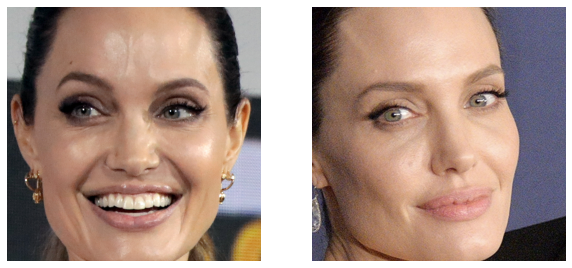

-----------------------
working with ssd
{'verified': True, 'distance': 0.3342940412954467, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'ssd', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 423, 'y': 168, 'w': 595, 'h': 846}, 'img2': {'x': 319, 'y': 455, 'w': 638, 'h': 841}}, 'time': 0.99}


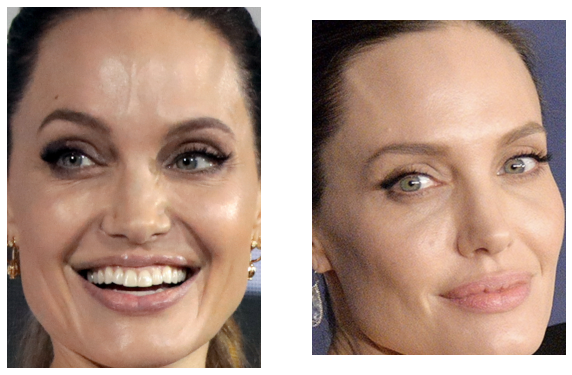

-----------------------
working with dlib
{'verified': True, 'distance': 0.36406663886433166, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'dlib', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 354, 'y': 354, 'w': 665, 'h': 666}, 'img2': {'x': 354, 'y': 650, 'w': 665, 'h': 666}}, 'time': 4.29}


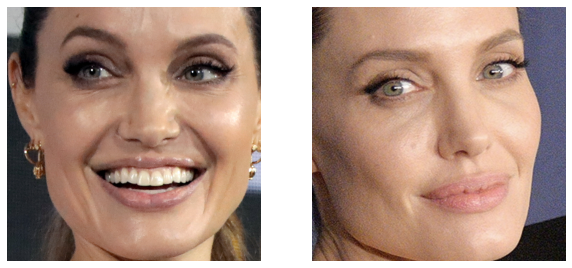

-----------------------
working with mtcnn
{'verified': True, 'distance': 0.30373654771963754, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'mtcnn', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 412, 'y': 161, 'w': 593, 'h': 853}, 'img2': {'x': 346, 'y': 480, 'w': 635, 'h': 831}}, 'time': 4.79}


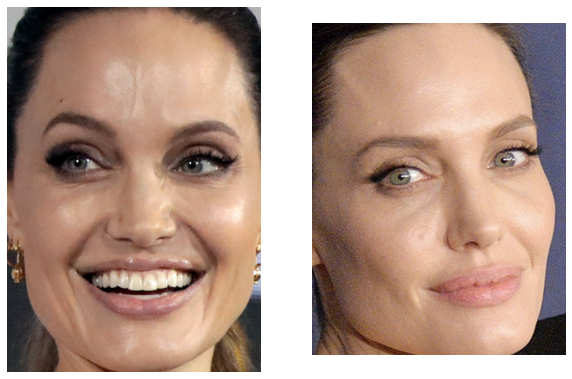

-----------------------
working with retinaface
{'verified': True, 'distance': 0.30428494432476183, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'retinaface', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 435, 'y': 189, 'w': 584, 'h': 810}, 'img2': {'x': 347, 'y': 478, 'w': 613, 'h': 852}}, 'time': 7.44}


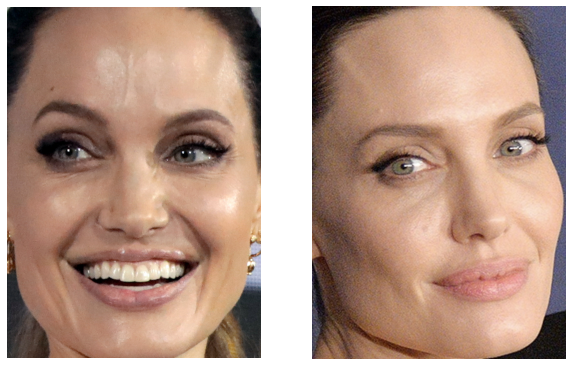

-----------------------
working with skip
{'verified': True, 'distance': 0.2565221356700692, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'skip', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 0, 'y': 0, 'w': 1382, 'h': 1868}, 'img2': {'x': 0, 'y': 0, 'w': 2280, 'h': 1588}}, 'time': 0.49}


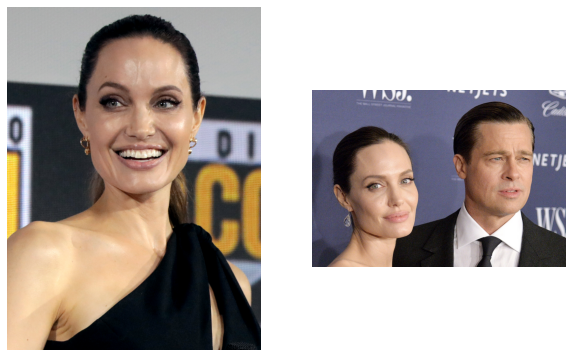

-----------------------


In [7]:
for detector_backend in detector_backends:
    print(f"working with {detector_backend}")
    resp = DeepFace.verify(img1_path=img1_path, img2_path=img2_path, detector_backend=detector_backend)
    print(resp)

    x1 = resp["facial_areas"]["img1"]["x"]
    y1 = resp["facial_areas"]["img1"]["y"]
    w1 = resp["facial_areas"]["img1"]["w"]
    h1 = resp["facial_areas"]["img1"]["h"]

    x2 = resp["facial_areas"]["img2"]["x"]
    y2 = resp["facial_areas"]["img2"]["y"]
    w2 = resp["facial_areas"]["img2"]["w"]
    h2 = resp["facial_areas"]["img2"]["h"]

    # -----------------------------------

    fig = plt.figure(figsize=(10, 10))

    fig.add_subplot(1, 2, 1)
    plt.imshow(img1[y1:y1+h1, x1:x1+w1][:,:,::-1])
    plt.axis("off")

    fig.add_subplot(1, 2, 2)
    plt.imshow(img2[y2:y2+h2, x2:x2+w2][:,:,::-1])
    plt.axis("off")

    plt.show()

    print("-----------------------")

# Face verification with different models

In [8]:
model_names = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "Dlib", "ArcFace", "SFace"]

In [9]:
for model_name in model_names:
    resp = DeepFace.verify(img1_path=img1_path, img2_path=img2_path, model_name = model_name)
    print(resp)
    print("------------------")

{'verified': True, 'distance': 0.32079959497933064, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 345, 'y': 211, 'w': 769, 'h': 769}, 'img2': {'x': 318, 'y': 534, 'w': 779, 'h': 779}}, 'time': 1.29}
------------------
{'verified': True, 'distance': 0.22603412333992334, 'threshold': 0.4, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 345, 'y': 211, 'w': 769, 'h': 769}, 'img2': {'x': 318, 'y': 534, 'w': 779, 'h': 779}}, 'time': 4.72}
------------------
{'verified': False, 'distance': 0.3077802545621603, 'threshold': 0.3, 'model': 'Facenet512', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 345, 'y': 211, 'w': 769, 'h': 769}, 'img2': {'x': 318, 'y': 534, 'w': 779, 'h': 779}}, 'time': 3.85}
------------------
{'verified': False, 'distance': 0.18892822617770877, 'threshold': 0.1, 'model': 'OpenFace'

# Face recognition

In [10]:
dfs = DeepFace.find(img_path=img2_path, db_path="dataset", model_name="Facenet", detector_backend="mtcnn", distance_metric="euclidean")

There are  71  representations found in  representations_facenet.pkl
find function lasts  2.243494987487793  seconds


In [11]:
for df in dfs:
    print(df.head())

             identity  source_x  source_y  source_w  source_h  \
0  dataset/couple.jpg      1410       308       549       800   

   Facenet_euclidean  
0                0.0  
             identity  source_x  source_y  source_w  source_h  \
0  dataset/couple.jpg       346       480       635       831   
1    dataset/img5.jpg       346       480       635       831   
2    dataset/img2.jpg       346       480       635       831   
3   dataset/img11.jpg       346       480       635       831   
4    dataset/img4.jpg       346       480       635       831   

   Facenet_euclidean  
0           0.000000  
1           7.106034  
2           7.547583  
3           7.822817  
4           7.920118  


# Embeddings

In [12]:
resp_objs = DeepFace.represent(img_path=img2_path)

2622D vector produced


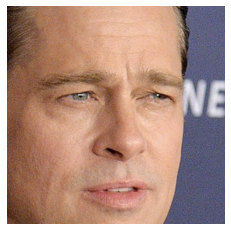

---------------------
2622D vector produced


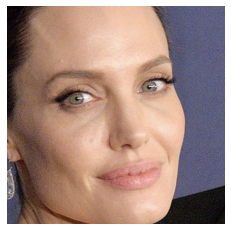

---------------------


In [13]:
for resp_obj in resp_objs:
    embedding = resp_obj["embedding"]
    x = resp_obj["facial_area"]["x"]
    y = resp_obj["facial_area"]["y"]
    w = resp_obj["facial_area"]["w"]
    h = resp_obj["facial_area"]["h"]
    print(f"{len(embedding)}D vector produced")
    plt.imshow(img2[y:y+h, x:x+w][:,:,::-1])
    plt.axis("off")
    plt.show()
    print("---------------------")

# Extract faces

In [14]:
img_objs = DeepFace.extract_faces(img_path=img2_path)

facial area found in coordinates {'x': 1437, 'y': 339, 'w': 675, 'h': 675} with 9.352941973658744 confidence score


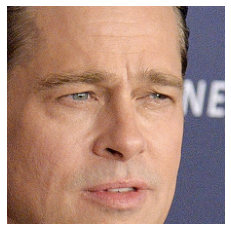

facial area found in coordinates {'x': 318, 'y': 534, 'w': 779, 'h': 779} with 6.524362047610339 confidence score


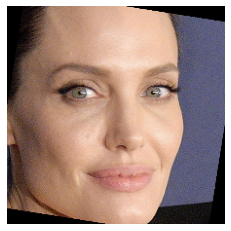

In [15]:
for img_obj in img_objs:
    confidence = img_obj["confidence"]
    facial_area = img_obj["facial_area"]
    print(f"facial area found in coordinates {facial_area} with {confidence} confidence score")
    plt.imshow(img_obj["face"])
    plt.axis("off")
    plt.show()